# Prediciting House Prices Using Multiple Linear Regression.

PROJECT BY: 
* Kelvin Rotich
* Grace Mutuku
* Joy Ogutu
* Peter Otieno
* Shuaib Mahamud

## Business Understanding
The real estate market in King County, Washington, which is part of the United States' Pacific Northwest, is vibrant and diverse. The county includes the thriving metropolis of Seattle, which is known for its booming tech sector, quick economic development, and gorgeous natural environs. King County's real estate market has always been characterized by a strong demand for homes, largely due to the presence of significant companies like Amazon, Microsoft, and Boeing that bring in a constant stream of workers. 

But this increase in demand has also resulted in affordability issues and a lack of homes, especially reasonably priced housing. The need for sustainable, environmentally friendly housing alternatives, urban expansion, and striking a balance between growth and protection of the environment are further challenges facing the King County real estate market. Because of this, there is fierce competition in the local real estate market, with developers, online platforms, and well-known real estate firms fighting for market share. 

Stakeholders in the area must comprehend the dynamics of the King County real estate market in addition to economic indicators, competition, and location-specific elements in order to effectively navigate the opportunities and difficulties posed by this dynamic environment.Property prices are influenced by three main categories of factors: property-specific attributes like location, size, condition, and amenities; market dynamics including supply, demand, interest rates, and economic conditions; and external factors such as neighborhood characteristics and government policies.

Understanding these factors is essential for various real estate stakeholders. Real estate agents need this knowledge to offer accurate pricing recommendations and effective marketing strategies. Homeowners can benefit from it when pricing their properties, and investors and developers can identify promising opportunities and maximize their returns.

## Problem Statement

The real estate market in King County operates in a highly dynamic environment, where economic conditions, fluctuations in housing demand, and various external factors contribute to its ever-changing nature. In this context, the repercussions of setting inappropriate property prices and making ill-informed selling decisions can be detrimental. Maximizing the selling price of a home demands a deep dive into research and market trend analysis. Key aspects to consider include evaluating property attributes such as location, size, amenities, condition, and their sensitivity to recent market shifts. By dissecting the complex web of relationships between these property characteristics and selling prices, the real estate agency endeavors to empower homeowners with the insights needed to mitigate the risks associated with pricing errors and suboptimal investment choices.

### Objectives
1. To identify and comprehend the key determinants that influence house prices.
2. Create a precise property valuation model to calculate the cost of homes depending on a range of characteristics.
3. Evaluate the model's performance in terms of its predictive accuracy.

### Importing libraries.

In [664]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline


# Data Understanding


In [665]:
# Loading the data
data = pd.read_csv("data\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [666]:
# Checking the columns in the dataset
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [667]:
# Checking the shape of the dataset
data.shape

(21597, 21)

Additional information of the columns:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront 
* `view` - Quality of view from house 
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

The dataset contains the sale prices and details of houses sold from 2nd May 2014 to 27th May 2015.
The dataset has 21 columns with 21,597 entries.

## Data Preparation

All columns apart from `waterfront`, `view`,`yr_renovated` and `sqft_basement` have no null values

In [668]:
# Getting information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [669]:
#Checking for null value counts and their percentages
columns_with_missing_values = ['waterfront', 'view', 'yr_renovated']
missing_values_table = pd.DataFrame([
    {
        'Column': column,
        'Missing Count': data[column].isnull().sum(),
        'Missing Percentage': (data[column].isnull().sum() / len(data[column])) * 100
    }
    for column in columns_with_missing_values])
print(missing_values_table)

         Column  Missing Count  Missing Percentage
0    waterfront           2376           11.001528
1          view             63            0.291707
2  yr_renovated           3842           17.789508


In [670]:
# Replace the null values in yr_renovated with the most most common value '0'
data['yr_renovated'].fillna(0, inplace = True)

In [671]:
# Replace the null values in waterfront and view with 'unknown'
data.fillna('unknown', inplace = True)

In [672]:
#Checking for null value counts and their percentages
columns_with_missing_values = ['waterfront', 'view', 'yr_renovated']
missing_values_table = pd.DataFrame([
    {
        'Column': column,
        'Missing Count': data[column].isnull().sum(),
        'Missing Percentage': (data[column].isnull().sum() / len(data[column])) * 100
    }
    for column in columns_with_missing_values])
print(missing_values_table)

         Column  Missing Count  Missing Percentage
0    waterfront              0                 0.0
1          view              0                 0.0
2  yr_renovated              0                 0.0


In [673]:
# Checking for duplicate entries
data.duplicated(subset='id').sum()

177

In [674]:
# Confirming the duplicate values
duplicate_rows = data[data.duplicated(subset=['id'], keep=False)].sort_values(by='id')
duplicate_rows['id'].value_counts()

795000620     3
8651402750    2
5536100020    2
7387500235    2
9238500040    2
             ..
2143700830    2
3271300955    2
1901600090    2
3323059027    2
2023049218    2
Name: id, Length: 176, dtype: int64


177 houses were flagged as duplicates according to the `id`

In [675]:
# Convert the datatype of date from object to datetime
data['date'] = pd.to_datetime(data['date'])

In [676]:
# Convert the datatype of yr_built and yr_renovated form numeric to object
data.yr_built = data['yr_built'].astype('object')
data.yr_renovated = data['yr_renovated'].astype('object')

In [677]:
# Create a function to map months to seasons
def get_season(date):
    if date.month in [3,4,5]:
        return 'Spring'
    elif date.month in [6,7,8]:
        return 'Summer'
    elif date.month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to the 'date' column to create a 'season' column
data['season'] = data['date'].apply(get_season)
data[['date', 'season']]

,date,season
0,2014-10-13,Autumn
1,2014-12-09,Winter
2,2015-02-25,Winter
3,2014-12-09,Winter
4,2015-02-18,Winter
...,...,...
21592,2014-05-21,Spring
21593,2015-02-23,Winter
21594,2014-06-23,Summer
21595,2015-01-16,Winter


In [678]:
# Feature engineering to create a new column called house_age_lv

data['house_age'] = 2015 - data.yr_built
def houseage(house_age):
    if house_age >= 50:
        return 'old'
    elif house_age >= 25:
        return 'Mid-age'
    else:
        return 'New'

# Apply the function to the 'date' column to c
data['house_age_lv'] = data['house_age'].apply(houseage)
data.drop(['house_age'], axis = 1, inplace = True)

# Checking on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  object        
 15  yr_renovated   2159

### Outliers
The presence of outliers, representing distinctive property attributes, is retained because they are genuine events that provide valuable information for predicting house prices.

In [679]:
# Creating a function that checks for outliers in all the columns
def check_outliers(data, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = data[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

id
Number of outliers: 0

price
Number of outliers: 1158

bedrooms
Number of outliers: 530

bathrooms
Number of outliers: 561

sqft_living
Number of outliers: 571

sqft_lot
Number of outliers: 2419

floors
Number of outliers: 0

sqft_above
Number of outliers: 610

zipcode
Number of outliers: 0

lat
Number of outliers: 2

long
Number of outliers: 255

sqft_living15
Number of outliers: 543

sqft_lot15
Number of outliers: 2188



In [680]:
# Checking for placeholders in each column
for column in data.columns:
    unique_values = data[column].unique()
    placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
    placeholder_count = len(placeholders)
    
    print(f"Column: '{column}'")
    print(f"Placeholders found: {placeholders}")
    print(f"Count of placeholders: {placeholder_count}\n")

Column: 'id'
Placeholders found: []
Count of placeholders: 0

Column: 'date'
Placeholders found: []
Count of placeholders: 0

Column: 'price'
Placeholders found: []
Count of placeholders: 0

Column: 'bedrooms'
Placeholders found: []
Count of placeholders: 0

Column: 'bathrooms'
Placeholders found: []
Count of placeholders: 0

Column: 'sqft_living'
Placeholders found: []
Count of placeholders: 0

Column: 'sqft_lot'
Placeholders found: []
Count of placeholders: 0

Column: 'floors'
Placeholders found: []
Count of placeholders: 0

Column: 'waterfront'
Placeholders found: []
Count of placeholders: 0

Column: 'view'
Placeholders found: []
Count of placeholders: 0

Column: 'condition'
Placeholders found: []
Count of placeholders: 0

Column: 'grade'
Placeholders found: []
Count of placeholders: 0

Column: 'sqft_above'
Placeholders found: []
Count of placeholders: 0

Column: 'sqft_basement'
Placeholders found: ['?']
Count of placeholders: 1

Column: 'yr_built'
Placeholders found: []
Count of pl

In [681]:
# Replace the ? placeholder with '0.0'
data['sqft_basement'].replace('?', '0.0', inplace = True)

In [682]:
# Changing the datatype of basements
data['sqft_basement'] = data['sqft_basement'].astype('float')

In [683]:
# Checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  object        
 15  yr_renovated   2159

## Exploratory Data Analysis

In [684]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


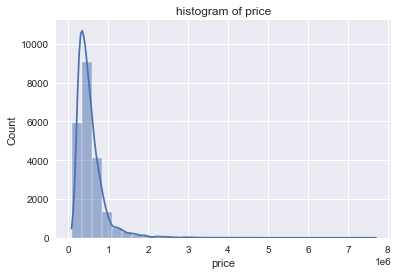

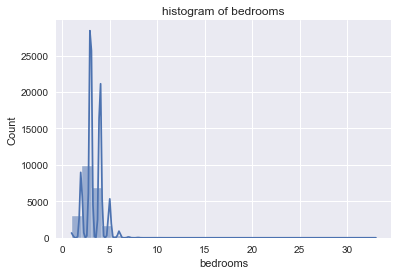

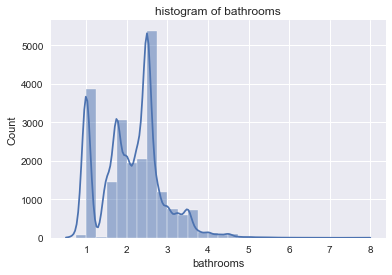

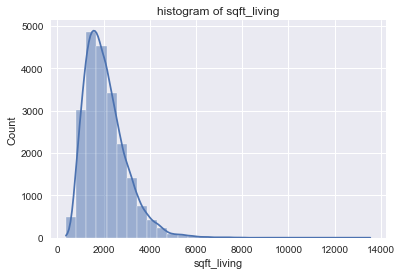

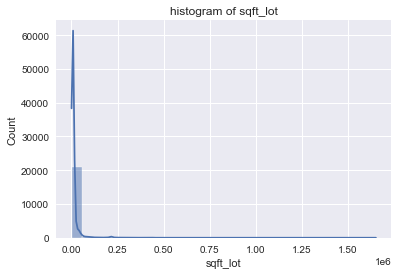

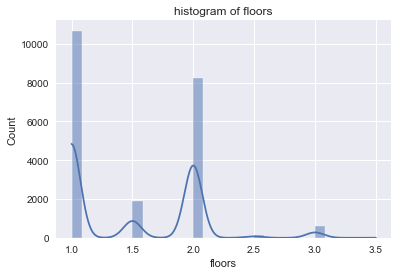

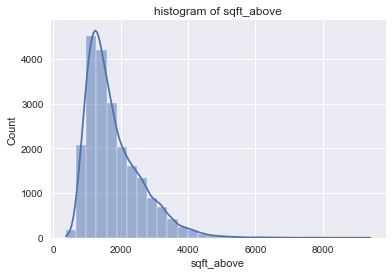

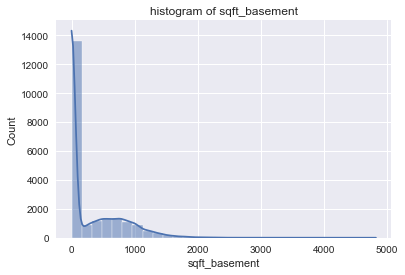

In [685]:
# Creating histograms for selected columns

# Identify numerical columns
numeric_columns = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]

# Iterate over numerical columns and create histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_columns, x=column,bins = 30 ,common_norm = False, kde = True)
    plt.title(f"histogram of {column}")
    plt.show()

## HISTOGRAM SUMMARY

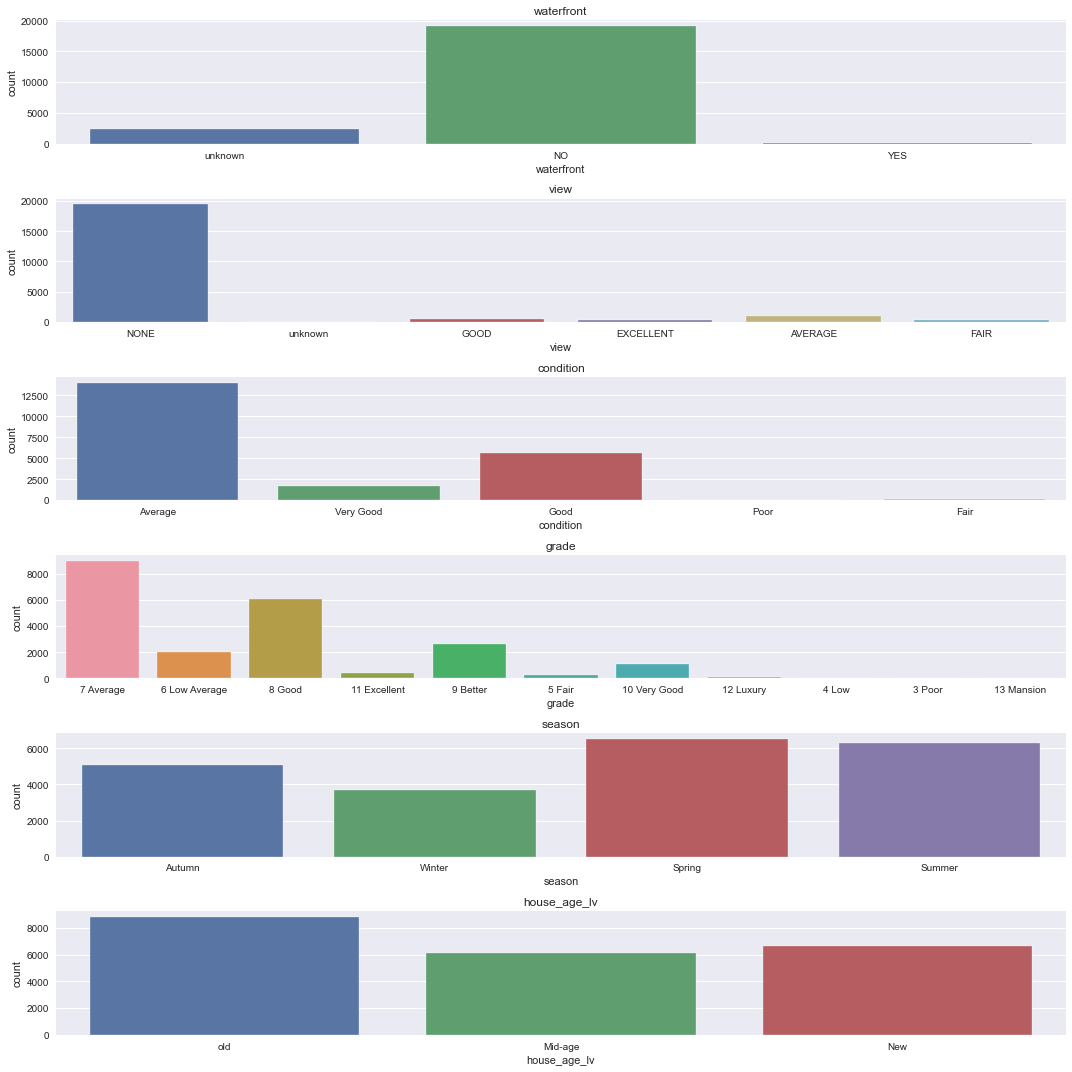

In [686]:
# creating count plots for selected columns

# Identify categorical columns
categorical_columns = data[['waterfront', 'view', 'condition', 'grade', 'season', 'house_age_lv']].columns

# Create a figure with a grid of subplots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, 15))

# Iterate over categorical columns and create countplots
for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

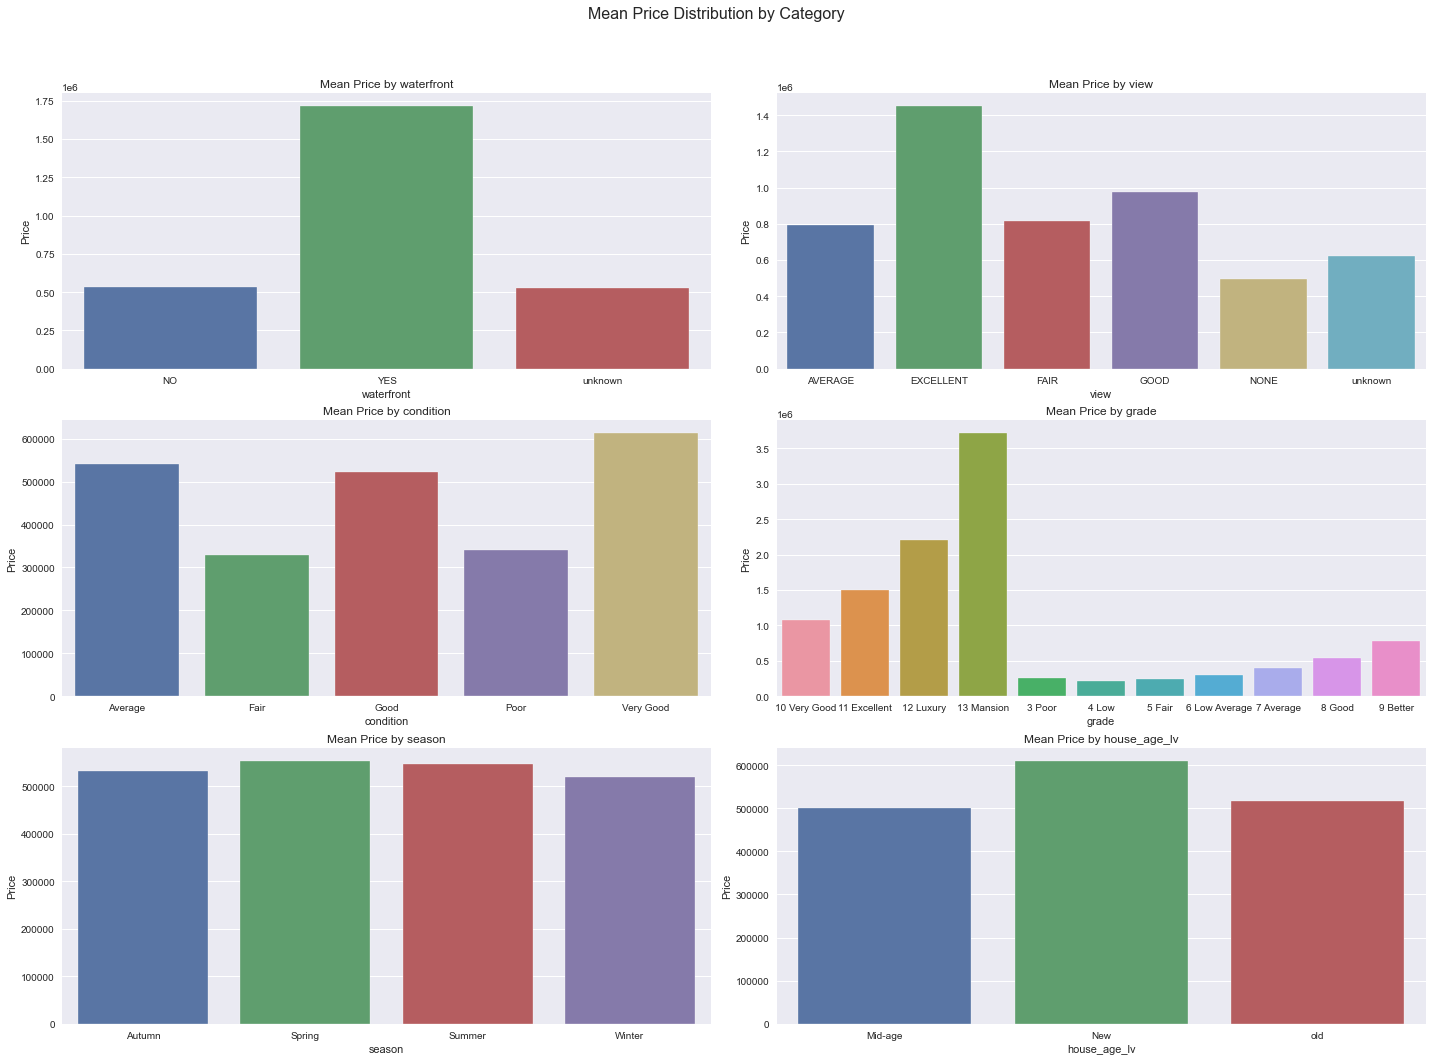

In [687]:
categories = ['waterfront', 'view', 'condition', 'grade', 'season', 'house_age_lv']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Mean Price Distribution by Category', fontsize=16)

# Loop through the categories and create bar plots
for i, category in enumerate(categories):
    row, col = i // 2, i % 2
    grouped_data = data.groupby(category)['price'].mean()
    sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=axes[row, col])
    axes[row, col].set_title(f'Mean Price by {category}')
    axes[row, col].set_xlabel(category)
    axes[row, col].set_ylabel('Price')

# Remove any extra empty subplot if the number of categories is odd
if len(categories) % 2 == 1:
    fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()


1. The houses with waterfronts nearby were sold at high prices compared to those without waterfronts nearby

2. The houses with an excellent view had higher prices compared with the other houses
3. The houses with very good condition sold at higher prices compared to the other houses
4. The houses given a mansion grade were sold at higher prices compared to the other houses
The houses sold during spring were sold at higher prices compared to the other seasons


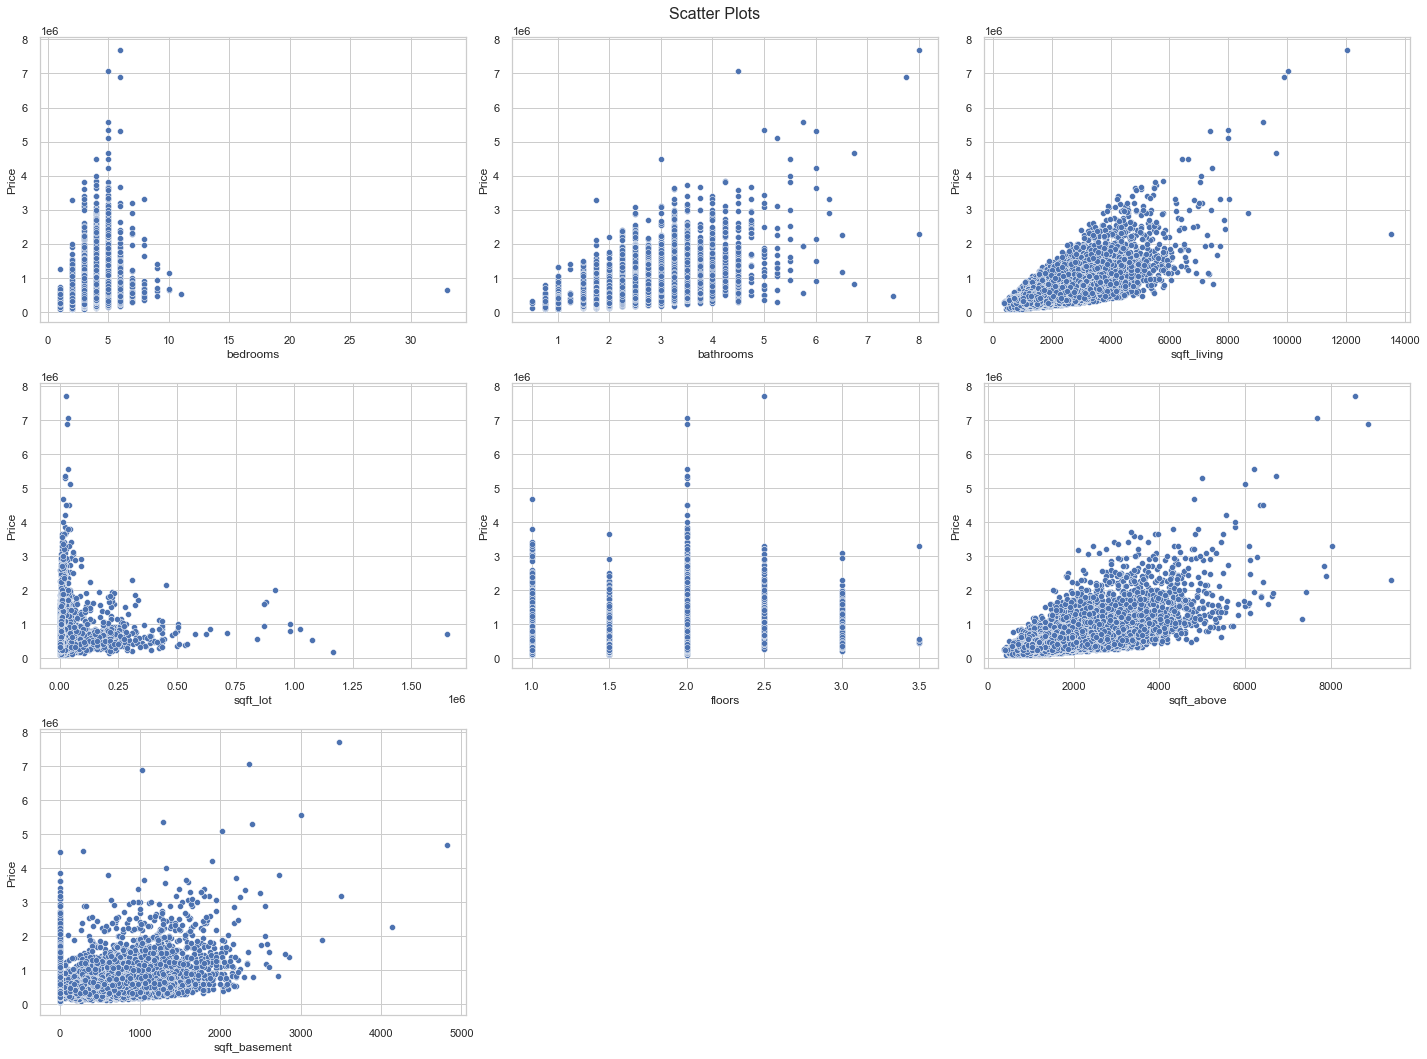

In [741]:
# setting the target column
target_column = "price"

# List of columns to create scatterplots for
columns_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
                   'sqft_basement']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Scatter Plots', fontsize=16)

# Create scatterplots for each selected column against the target using Seaborn
for i, column in enumerate(columns_to_plot):
    row, col = i // 3, i % 3
    sns.scatterplot(x=column, y=target_column, data = data, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Price')

# Remove any extra empty subplot if the number of categories is odd
if len(column) % 3 == 1:
    fig.delaxes(axes[2, 2])
    fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show();

In [689]:
# comparing correlation between price and selected features
numeric_columns = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]
correlation_matrix = numeric_columns.corr()['price']
correlation_matrix

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
sqft_basement    0.321108
sqft_lot15       0.082845
sqft_living15    0.585241
Name: price, dtype: float64

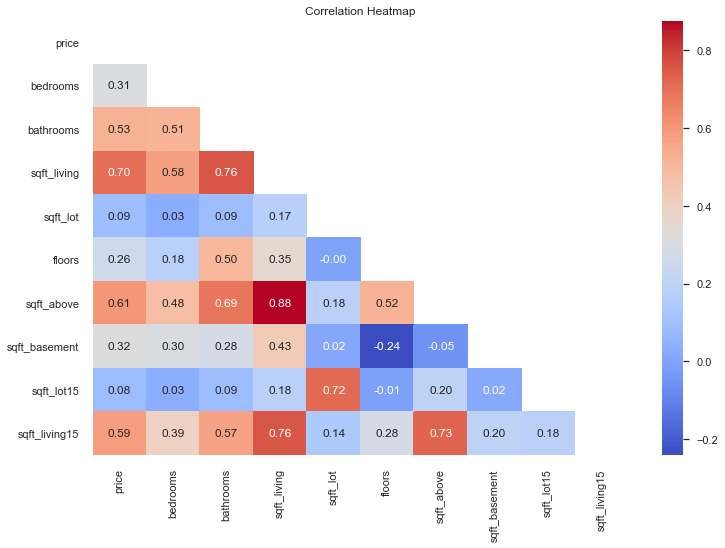

In [690]:
# creating a heatmap
correlation_matrix = numeric_columns.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,)
plt.title('Correlation Heatmap')
plt.show()


## Modelling

In [691]:
# Based on the correlation matrix above, we observed that the sqft_living column has the highest correlation with price.
# This column will be our predictor variable for our baseline model

# Setting the target and predictor variables for our baseline model
y = data['price']
X_baseline = data[['sqft_living']]

# Creating the model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
# Fitting the model 
baseline_results = baseline_model.fit()
# Printing the summary of the model
print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:33:02   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [692]:
# Getting the coefficients of the model
baseline_results.params

const         -43988.892194
sqft_living      280.863014
dtype: float64

In [693]:
# Getting the p-value of the f-statistic
baseline_results.f_pvalue

0.0

In [694]:
# Getting the R-squared of the model
baseline_results.rsquared

0.49268789904035104

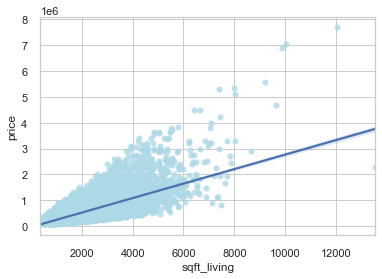

In [695]:
# Both the model and the coefficients are statistically significant since their p-values are below our set alpha of 0.05 
# Based on the baseline model, for a house where its living room has a square-foot area of 0, its price goes for about -43988.89
# For every additional living space square-foot area, the price of the house increases by about 280.86
# 49.3% of variability of price can be explained by the living space square-foot area
# We can now plot the fit of the model and the residuals

# Plotting the fit
sns.regplot(x = 'sqft_living', y = 'price', data = data, scatter_kws={'color': 'lightblue'})
plt.show()


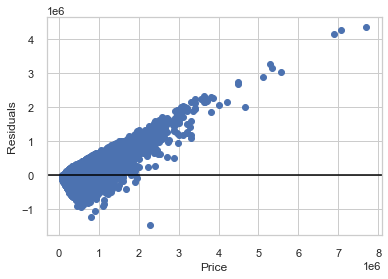

In [696]:
# Plotting residuals
fig, ax = plt.subplots()
ax.scatter(data['price'], baseline_results.resid)
ax.axhline(y = 0, color = 'black')
ax.set_xlabel('Price')
ax.set_ylabel('Residuals');

In [697]:
# Create a function that calculates mae and rmse
def metrics(results):
    mae = (results.resid.abs().sum()) / len(results.resid)
    rmse = (((results.resid ** 2).sum()) / len(results.resid)) ** 0.5
    print(f'MAE: {mae} \nRMSE: {rmse}')

metrics(baseline_results)

MAE: 173824.8874961748 
RMSE: 261655.00451904477


In [698]:
# The residual plots show clearly that the model is not sufficient enough.
# This is because the actual values and the residuals are far from the regression line.
# The next step we will take is to create a model with the columns we selected for the correlation matrix in the previous step.
X_1 = numeric_columns.copy()
X_1 = X_1.drop(columns = 'price', axis = 1)
model_1 = sm.OLS(y, sm.add_constant(X_1))
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2584.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:33:47   Log-Likelihood:            -2.9950e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21587   BIC:                         5.991e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.242e+04   8612.601      1.442

In [699]:
# Creating a function that returns the p-values of the F-statistic, coefficients and adjusted R-squared of the model
def model_info(results):
    # Finding the p-value of the F-statistic
    p_value = results.f_pvalue
    # Finding the coefficients
    coefficients = results.params
    # Finding the adjusted R-squared
    adj_r_squared = (round(results.rsquared_adj, 4)) * 100
    # Returns the values
    print(f'p-value: {p_value},\ncoefficients: {coefficients}, \nAdjusted R-Squared: {adj_r_squared}')
# Using the function for the model
model_info(results_1)

p-value: 0.0,
coefficients: const            12420.441945
bedrooms        -58468.043349
bathrooms          988.707508
sqft_living        269.968592
sqft_lot             0.051448
floors           17510.194445
sqft_above          -6.837082
sqft_basement       45.463170
sqft_lot15          -0.860178
sqft_living15       72.818082
dtype: float64, 
Adjusted R-Squared: 51.839999999999996


In [700]:
# The model is statistically significant overall, with an F-statistic p-value well below 0.05. 
# This indicates that at least one of the predictor variables in the model is associated with the target variable.
# The model can explain 50.96% of the variance in sales.
# When all the predictor variables are at 0, the target variable, sales will be 75,695.
# For each additional bedroom, there is an associated decrease in sale price by about 60,644.
# For each additional bedroom, there is an associated increase in sale price by about 3676.
# For each additional square foot of living space in the house, there is an associated increase in sale price by about 286.
# For each additional square foot of lot size, there is an associated decrease in sale price by about 0.35.
# For each additional floor, there is an associated increase in sale price by about 11812.
# For each additional square foot of the house apart from the basement, there is an associated increase in sale price by about 21.
# For each additional square foot of the basement, there is an associated increase in sale price by about 54.

In [701]:
# Finding metrics of model
metrics(results_1)

MAE: 167781.30532381844 
RMSE: 254879.74279573272


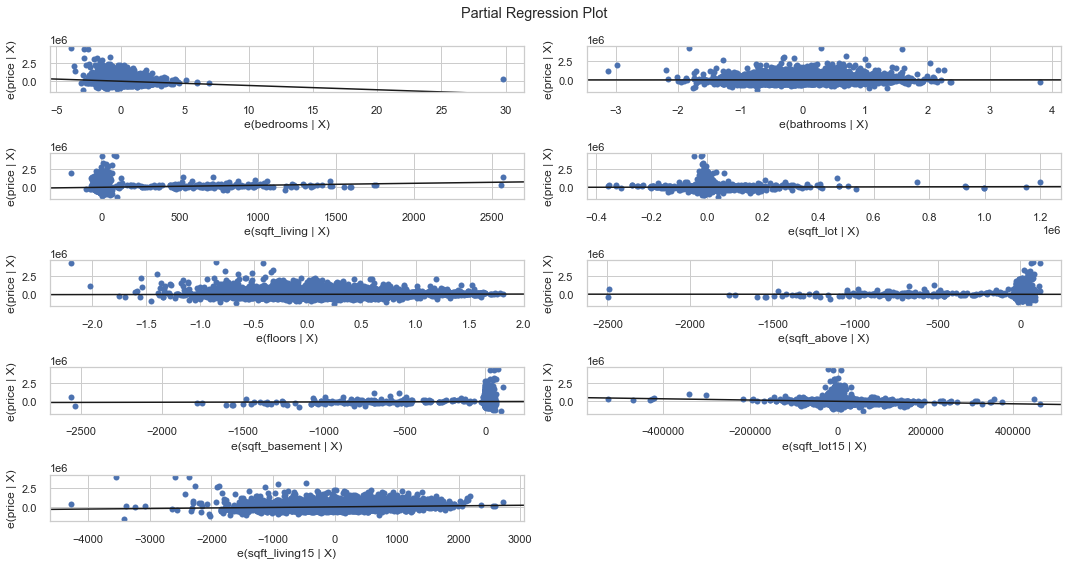

In [702]:
# Creating a function that plots residuals
def plot_residuals(results, X):
    # Plotting the residuals
    fig = plt.figure(figsize = (15,8))
    sm.graphics.plot_partregress_grid(
        results,
        exog_idx = list(X.columns),
        fig = fig)
    plt.tight_layout()
    plt.show();

# Plotting for the model
plot_residuals(results_1, X_1)

In [703]:
# Based on the p-values of the coefficients, the model is not sufficient enough.
# We will standardize and add some categorical columns to refine the model's performance


In [704]:
# To standardize the numerical columns
X_standardized = X_1.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) \
                            / X_standardized[col].std()
    
# Creating the dummy variables for the categorical columns we will add and dropping the others
X_cat = pd.get_dummies(data, columns=["waterfront", 'grade', 'house_age_lv'], drop_first=True, dtype=int)
X_cat = X_cat.drop(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view', 'waterfront_unknown', 'season', 'condition'], axis = 1)

#Combining the two dataframes
X_2 = pd.concat([X_standardized, X_cat], axis = 1)

# Creating the model
model_2 = sm.OLS(y, sm.add_constant(X_2))
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:34:05   Log-Likelihood:            -2.9552e+05
No. Observations:               21597   AIC:                         5.911e+05
Df Residuals:                   21574   BIC:                         5.913e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.176e+05   8

In [705]:
# Getting the model info
model_info(results_2)

p-value: 0.0,
coefficients: const                  8.176434e+05
bedrooms              -2.563408e+04
bathrooms              3.799906e+04
sqft_living            1.268989e+05
sqft_lot               1.616574e+03
floors                 2.928341e+04
sqft_above            -2.004390e+04
sqft_basement          1.424842e+04
sqft_lot15            -1.479854e+04
sqft_living15          2.718895e+04
waterfront_YES         7.193868e+05
grade_11 Excellent     2.734823e+05
grade_12 Luxury        7.644263e+05
grade_13 Mansion       1.992768e+06
grade_3 Poor          -4.692654e+05
grade_4 Low           -5.309623e+05
grade_5 Fair          -5.263303e+05
grade_6 Low Average   -4.802120e+05
grade_7 Average       -4.120355e+05
grade_8 Good          -3.264435e+05
grade_9 Better        -1.859231e+05
house_age_lv_New      -6.527357e+04
house_age_lv_old       1.619054e+05
dtype: float64, 
Adjusted R-Squared: 66.66


In [706]:
# Getting the metrics for the model
metrics(results_2)

MAE: 139993.9354728652 
RMSE: 212020.519748943


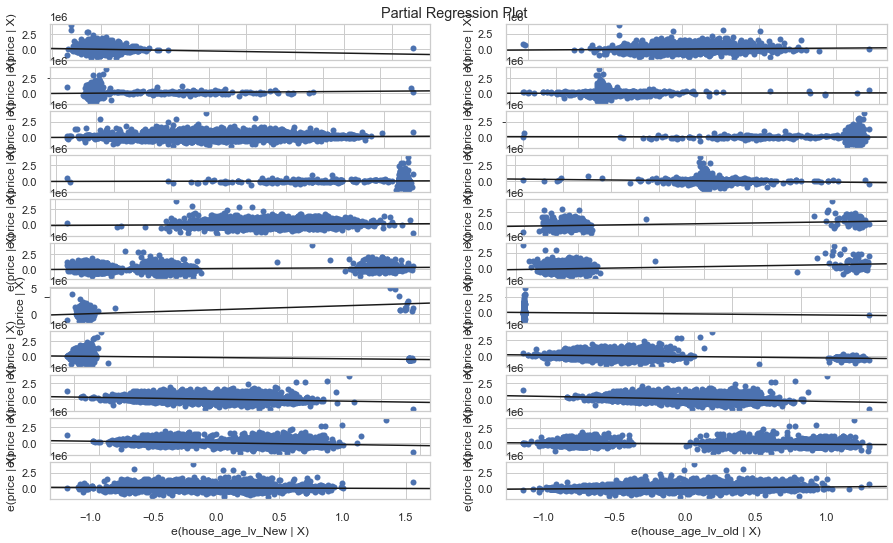

In [707]:
# Plotting the residuals of the model
plot_residuals(results_2, X_2)

In [708]:
# Based on the metrics of the model and the residual plots, the model looks insufficient.
# We need to create another model.
# We will drop the columns that may lead to multicollinearity

In [709]:
# This code will help us get the numeric variables that are correlated
#  It saves absolute value of correlation matrix as a data frame
# sort values. 0 is the column automatically generated by the stacking
df=X_standardized.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. 
df.drop_duplicates(inplace=True)
# We look for values which have a correlation greater than 0.75 and less than 1
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758


In [710]:
# Based on the above solution, we can drop sqft_above and sqft_living15 columns and try to model again
X_3 = X_2.copy()
X_3.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)
model_3 = sm.OLS(y, sm.add_constant(X_3))
results_3 = model_3.fit()
print(results_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2141.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:34:33   Log-Likelihood:            -2.9558e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21576   BIC:                         5.914e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.372e+05   7

In [711]:
# Calling the model_info function
model_info(results_3)

p-value: 0.0,
coefficients: const                  8.371587e+05
bedrooms              -2.577649e+04
bathrooms              3.715529e+04
sqft_living            1.219729e+05
sqft_lot               3.931212e+02
floors                 2.550042e+04
sqft_basement          2.106454e+04
sqft_lot15            -1.324460e+04
waterfront_YES         7.220015e+05
grade_11 Excellent     2.786822e+05
grade_12 Luxury        7.685192e+05
grade_13 Mansion       1.968461e+06
grade_3 Poor          -4.904516e+05
grade_4 Low           -5.488261e+05
grade_5 Fair          -5.531277e+05
grade_6 Low Average   -5.097316e+05
grade_7 Average       -4.368436e+05
grade_8 Good          -3.423826e+05
grade_9 Better        -1.918366e+05
house_age_lv_New      -6.519620e+04
house_age_lv_old       1.593345e+05
dtype: float64, 
Adjusted R-Squared: 66.46


In [712]:
# Getting the metrics of the model
metrics(results_3)

MAE: 140536.28751924628 
RMSE: 212637.44161924344


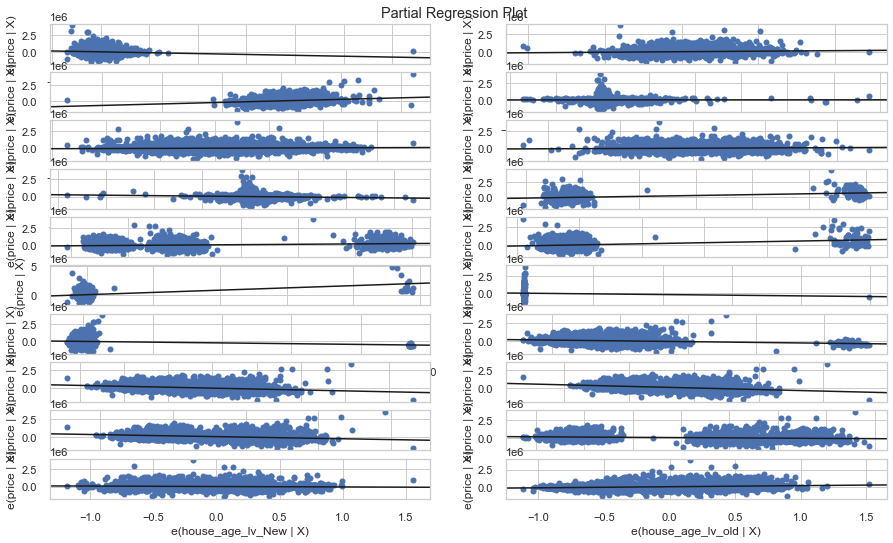

In [713]:
# Plotting the residuals
plot_residuals(results_3, X_3)

In [714]:
# Based on the model, metrics and the residuals, the model is still insufficient. 
# We will drop some columns to improve the model
X_4 = X_3.copy()
X_4.drop(['sqft_lot'], axis=1, inplace=True)
model_4 = sm.OLS(y, sm.add_constant(X_4))
results_4 = model_4.fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2254.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:35:13   Log-Likelihood:            -2.9558e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21577   BIC:                         5.914e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.372e+05   7

In [715]:
model_info(results_4)

p-value: 0.0,
coefficients: const                  8.371578e+05
bedrooms              -2.578436e+04
bathrooms              3.715751e+04
sqft_living            1.220053e+05
floors                 2.548987e+04
sqft_basement          2.105222e+04
sqft_lot15            -1.296778e+04
waterfront_YES         7.219689e+05
grade_11 Excellent     2.786895e+05
grade_12 Luxury        7.685384e+05
grade_13 Mansion       1.968309e+06
grade_3 Poor          -4.904488e+05
grade_4 Low           -5.488049e+05
grade_5 Fair          -5.530617e+05
grade_6 Low Average   -5.097242e+05
grade_7 Average       -4.368455e+05
grade_8 Good          -3.423833e+05
grade_9 Better        -1.918497e+05
house_age_lv_New      -6.519534e+04
house_age_lv_old       1.593390e+05
dtype: float64, 
Adjusted R-Squared: 66.47


In [716]:
metrics(results_4)

MAE: 140537.59614097438 
RMSE: 212637.61630999626


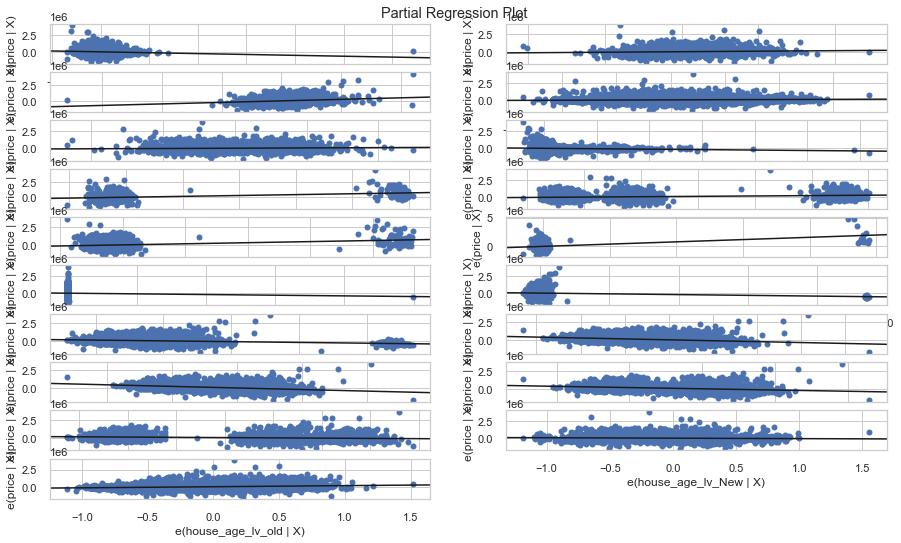

In [717]:
plot_residuals(results_4, X_4)